In [12]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc

bits for sending Alphabet.
4bits 6 / 5bits 20 T = 26
4.76 임
average of alphabet = 4.7
10,000,000번 하니 4.699909449804844
log{2}{26} = 4.700439718141093


In [73]:
import pandas as pd

for n in [10,100,1000,10000,100000,1000000,10000000] :
    k = []
    for j in range(n) :
    # for j in range(26) :
        target = np.random.randint(26)
        # target = j
        alpha = list(range(26))
        i = 0 
        while i < 6 :
            median = (alpha[0] + alpha[-1])// 2

            if len(alpha) == 2 or(median == target and len(alpha) == 3):
                k.append(i+1)
                # print(i+1,"번째에 종료")
                break

                # print('**********')
                # print(f'target : {target}' )
                # print('---------')
            elif len(alpha)%2 == 0 :
                if target > median :
                    alpha = list(range(median+1, alpha[-1]+1))
                    # print(f" 짝 T >= M --- num: {i+2} --- median : {median} --- alpha : {alpha}")

                if target <= median : 
                    alpha = list(range(alpha[0], median+1))
                    # print(f" 짝 T < M --- num: {i+2} --- median : {median} --- alpha : {alpha}")


            elif len(alpha)%2 == 1 : 
                if target >= median :
                    alpha = list(range(median, alpha[-1]+1))
                    # print(f" 홀 T > M --- num: {i+2} --- median : {median} --- alpha : {alpha}")

                if target < median : 
                    alpha = list(range(alpha[0], median))
                    # print(f" 홀 T < M --- num: {i+2} --- median : {median} --- alpha : {alpha}")
                    
            i += 1

    asd = pd.Series(k)
    mean = asd.mean()
    b = math.log2(26)
    
    print(f'{n}회 ----- 평균 : {round(mean,7)} ------ log(2)(26)과 차이 : {round(b-mean,7)}')
            

10회 ----- 평균 : 4.6666667 ------ log(2)(26)과 차이 : 0.0337731
100회 ----- 평균 : 4.6625 ------ log(2)(26)과 차이 : 0.0379397
1000회 ----- 평균 : 4.6848404 ------ log(2)(26)과 차이 : 0.0155993
10000회 ----- 평균 : 4.6921685 ------ log(2)(26)과 차이 : 0.0082712
100000회 ----- 평균 : 4.7003388 ------ log(2)(26)과 차이 : 0.000101
1000000회 ----- 평균 : 4.6991844 ------ log(2)(26)과 차이 : 0.0012554
10000000회 ----- 평균 : 4.699786 ------ log(2)(26)과 차이 : 0.0006537


In [10]:
import math
import pandas as pd
import numpy as np

k = []

for j in range(1000000) :  
    alpha = list(range(26)) ## Alphabet을 0~25로 치환한다고 생각
    target = np.random.randint(26)  ## 0~25 중 랜덤으로 값 생성

    i = 0 
    while i < 10 :
        median = (alpha[0] + alpha[-1])// 2

        if len(alpha) == 2 or(median == target and len(alpha) == 3):
            k.append(i+1) ## i = 물어본 질문 수 
            break
        
        ## 값이 짝수개인 리스트를 나눌 때
        elif len(alpha)%2 == 0 :
            if target > median :
                alpha = list(range(median+1, alpha[-1]+1))
                # print(f" 짝 T >= M --- median : {median} --- alpha : {alpha}")  

            if target <= median : 
                alpha = list(range(alpha[0], median+1))
                # print(f" 짝 T < M --- median : {median} --- alpha : {alpha}")

        ## 값이 홀수개인 리스트를 나눌 때
        elif len(alpha)%2 == 1 : 
            if target >= median :
                alpha = list(range(median, alpha[-1]+1))
                # print(f" 홀 T > M --- median : {median} --- alpha : {alpha}")

            if target < median : 
                alpha = list(range(alpha[0], median))
                # print(f" 홀 T < M --- median : {median} --- alpha : {alpha}")
                
        i += 1

result = pd.Series(k)
mean = result.mean()  ## 평균
val_k = result.value_counts() ## 빈도수

print('평균 : ', round(mean,6))
print('log_2(26) :', round(math.log2(26),6))
print('차이 :', round(mean - math.log2(26),6))
print('-'*10)
print('-'*10)
print(val_k)

평균 :  4.700162
log_2(26) : 4.70044
차이 : -0.000278
----------
----------
5    538370
4    230552
dtype: int64


([<matplotlib.axis.XTick at 0x21adde24a90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

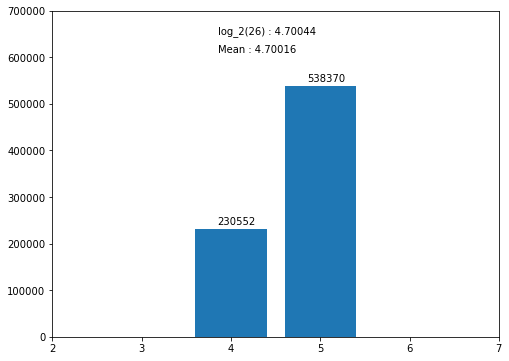

In [14]:
#### setting the Figure 
fig = plt.figure(figsize=(8, 6))
plt.ylim(0,700000)
###variables
asd = pd.Series(k)
val_k = asd.value_counts().sort_values() 
val_ind = val_k.index.tolist() ### x_value
val_values = val_k.values.tolist() ### y_value

for index, value in enumerate(val_values) :
    plt.text(index+3.85,value+10000,str(value))

mean = asd.mean()
plt.text(3.85,650000,f'log_2(26) : {round(math.log2(26),5)}')
plt.text(3.85,610000,f'Mean : {round(asd.mean(),5)}')

plt.bar(val_ind, val_values)
plt.xticks(range(2,8))

In [88]:
asd = pd.Series(k)
mean = asd.mean()
val_k = asd.value_counts().sort_values()
lst_4 = list(range(1, val_k.iloc[0]+1))
lst_5 = list(range(1, val_k.iloc[1]+1))

x, y =[], []

def update(i) :
    x_4 = lst_4[i]
    x_5 = lst_5[i]
    plt.bar([4,5],[x_4,x_5])

plt.title("Some Title, Year: {} ".format(5000), color=("blue"))
ani = FuncAnimation(fig, update, interval=100)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [77]:


plt.text(index+3.85,value+100,str(value))
        
plt.text(3.8,6500,f'Mean : {asd.mean()}')


fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(0, 150)
plt.style.use("seaborn")

lst1=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15 ]
lst2=[0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100]


y1, y2, = [], []

def animate(i):
    y1=lst1[i]
    y2=lst2[i]
    
    plt.bar(["one", "two"], [y1,y2])

plt.title("Some Title, Year: {} ".format(5000), color=("blue"))
ani = FuncAnimation(fig, animate, interval=100)

In [ ]:
from string import ascii_lowercase

alphabet_list = list(ascii_lowercase)




In [6]:
import math
a = 0
for i in [0.3,0.2,0.15,0.1,0.05,0.2] :
    a += i*math.log2(i)


print(abs(round(a,4)))

평균 2.4개



2.4087


In [8]:
math.log2(10/3) 

1.736965594166206

In [9]:
k = 0.3+0.4+0.6+0.6+0.5+0.25
k

2.65

In [16]:
import random
a = [1]*30 + [2]*30 + [3]*30 + [4]*15 + [5]*10 + [6]*5
random.shuffle(a)

print(a)

[2, 4, 1, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 2, 4, 1, 5, 5, 1, 5, 5, 5, 4, 2, 1, 3, 2, 1, 1, 4, 4, 3, 5, 2, 3, 4, 2, 1, 3, 1, 1, 3, 3, 2, 2, 2, 3, 1, 2, 4, 1, 3, 1, 3, 1, 6, 5, 3, 2, 4, 1, 6, 2, 4, 2, 3, 2, 2, 3, 1, 3, 1, 2, 2, 3, 3, 3, 4, 3, 1, 5, 4, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 6, 1, 2, 2, 3, 2, 3, 1, 2, 2, 6, 3, 1, 3, 4, 1, 6, 1, 5, 1, 2, 5, 2, 1, 4, 4, 2, 4]
